In [1]:
import importlib
import SFFI.util_plot as ut 
import matplotlib.pyplot as plt
from script_figure import plot_error_and_accuracy 
from script_figure import plot_time_vs_key
from _helper._load_csv import aggreagate_csv_from_cluster
from script_figure import plot_trajectory_field as plot_trajectory
from simulation_models import gray_scott
import os
from script_figure import labels_plot
import script_figure.helper_figure as hf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from script_figure import plot_error_dim_OU as plot_error_dim
import seaborn as sns

ut.set_favorite_plot_config()
aggreagate_csv_from_cluster(select_file="gray", path=os.path.abspath('') + "/csv")
model_class = gray_scott.GrayScott

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

In [2]:
def add_letter(ax, letter):
    ax.text(-0.1, 1.2, "(" + letter + ")", transform=ax.transAxes, fontsize=14, va='top', ha='left')

name_csv_base = "grayscott"
name_csv_time =  name_csv_base + "_n.pkl"
name_csv_D_strength = name_csv_base + "_diffusion_strength.pkl"
name_csv_experimental_noise = name_csv_base + "_experimental_noise.pkl"
name_csv_dt = name_csv_base + "_dt.pkl"

method_to_plot = ["AIC",  "BIC", "PASTIS", #"PASTIS tr.", "PASTIS_Pier",
                  "Total model", "Total model tr", "Real model tr"]

l_y_plot = ["Exact_model_found", "Accuracy_model","ratio_error_real_model", "ratio_error_real_model_predictive"]

n_rows, n_cols = 3, 3
n_rows = len(l_y_plot)
n_rows = max(n_rows, len(l_y_plot))
fig = plt.figure(figsize=ut.set_size(width="article", fraction=2, subplots=(n_rows, n_cols)),
                 layout='constrained')
gs = fig.add_gridspec(nrows=n_rows, ncols=n_cols)

axs = plot_error_and_accuracy.plot_from_csv(name_csv_time, 
                                  parameter="time",
                                  method_to_plot=method_to_plot,
                                  axs=[fig.add_subplot(gs[i, 0]) for i in range(len(l_y_plot))],
                                  l_y_plot=l_y_plot,
                                  verbose=False,
                                  )

axs = plot_error_and_accuracy.plot_from_csv(name_csv_D_strength, 
                                  parameter="D_strength",
                                  method_to_plot=method_to_plot,
                                  axs=[fig.add_subplot(gs[i, 1]) for i in range(len(l_y_plot))],
                                  l_y_plot=l_y_plot,
                                  verbose=True,
                                  )

axs = plot_error_and_accuracy.plot_from_csv(name_csv_dt, 
                                  parameter="dt",
                                  method_to_plot=method_to_plot,
                                  axs=[fig.add_subplot(gs[i, 2]) for i in range(len(l_y_plot))],
                                  l_y_plot=l_y_plot,
                                  verbose=False,
                                  )

# bax = plot_trajectory.plot_trajectory_Lotka_Volterra(name_csv_time, model_class, subplot_spec=gs[0, 0], parameter="time", parameters_value_plot=[200])
# add_letter(bax.axs[0], "a")
fig.suptitle("Gray-Scott model")

[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
[Errno 2] No such file or directory: 'grayscott_diffusion_strength.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_diffusion_strength.pkl'
method in csv avalaible ['Real_model_Ito_A_True_diffusion_Multiplicative'
 'Total_model_Ito_A_True_diffusion_Multiplicative'
 'PASTIS_p_0.001_Ito_A_True_diffusion_Multiplicative'
 'BIC_True_Ito_A_True_diffusion_Multiplicative'
 'AIC_Ito_A_True_diffusion_Multiplicative']
{'AIC_Ito_A_True_diffusion_Constant': 'AIC', 'PASTIS_p_0.001_Ito_A_True_diffusion_Constant': 'PASTIS', 'BIC_True_Ito_A_True_diffusion_Constant': 'BIC'}
hue_order ['AIC_Ito_A_True_diffusion_Constant', 'BIC_True_Ito_A_True_diffusion_Constant', 'PASTIS_p_0.001_Ito_A_True_diffusion_Constant']
y_plot Exact_model_found
hue_order ['AIC_Ito_A_True_diffusion_Constant', 'BIC_True_Ito_A_True_diffusion_Constant', 'PASTI

Text(0.5, 0.98, 'Gray-Scott model')

In [3]:
from _helper._load_csv import read_csv
df = read_csv(name_csv_time)
df.ratio_error_real_model.to_numpy()

[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'


array([1., 1., 1., ..., 1., 1., 1.], shape=(11396,))

In [4]:
import SFFI.video_field as vd
#vd.show_video_phi(x, number_images_video=10, fps=10, figsize=(12, 5), name_plot=["$u$", "$v$"])# save_name="figures/gray_scott")#

In [5]:
importlib.reload(plot_trajectory)
ax_graph_1, ax_graph_2, ax_graph_3, ax_graph_4 = None, None, None, None
simu_1 = plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_1, parameter="time", parameters_value_plot=[1], start_time=True)
simu_2 = plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_2, parameter="time", parameters_value_plot=[10])
simu_3 = plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_3, parameter="time", parameters_value_plot=[20])
simu_4 = plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_4, parameter="time", parameters_value_plot=[30])

[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
index real base 7
total base 78
[1]
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
index real base 7
total base 78
[10]
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
index real base 7
total base 78
[20]
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
index real base 7
total base 78
[30]


[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'

[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
index real base 7
total base 78
[1]
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
index real base 7
total base 78
[10]
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
index real base 7
total base 78
[20]


Text(-0.3, 1.05, '(d4)')

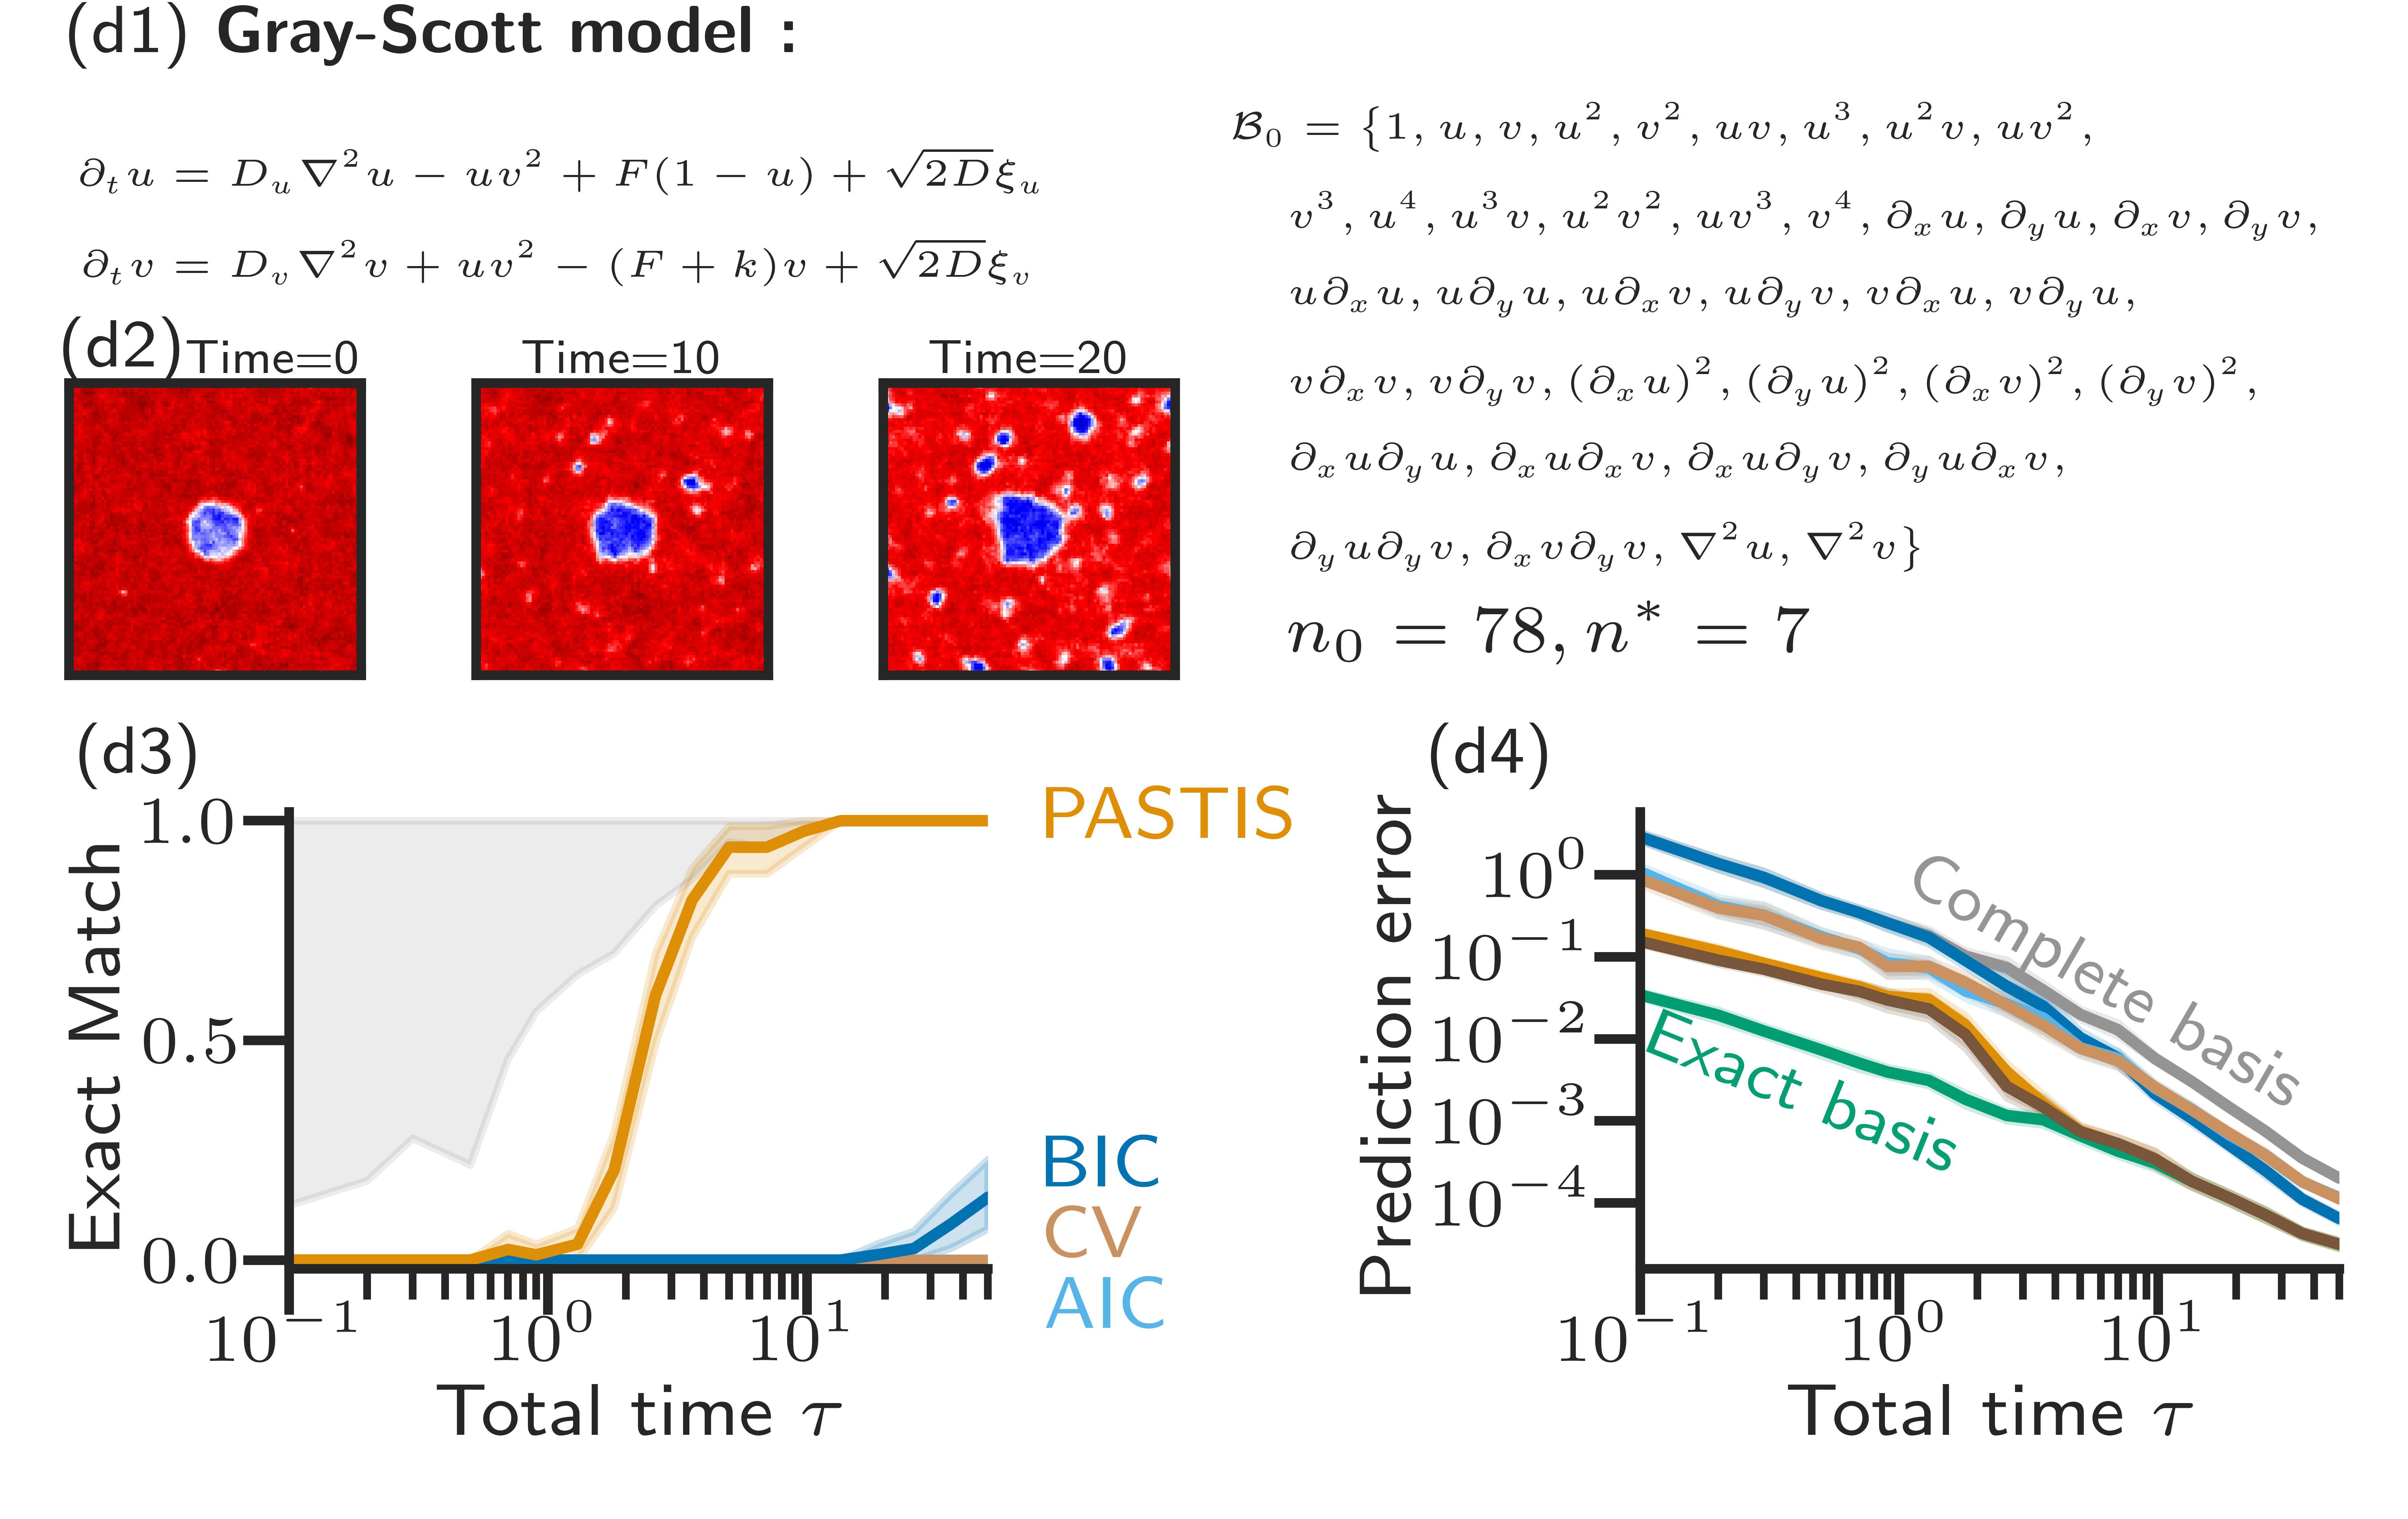

In [6]:
import simulation_models.gray_scott_utils.dumb_base as bd
importlib.reload(labels_plot)

ut.set_favorite_plot_config()

def plot_base(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.axis('off')
    base_functions_u = [expr for expr, comp in bd.base_function_symbols if comp == 'u']
    base_functions_v = [ expr for expr, comp in bd.base_function_symbols if comp == 'v']
    base_functions_u = base_functions_u[2:] + base_functions_u[:2]
    indices = [0, 0.25, 0.5, 0.65, 0.8, 0.9, 1]
    indices = [int(i*len(base_functions_u)) for i in indices]
    text_base_u = r"$\begin{aligned} \mathcal{B}_0 & = \big\{"
    for i in range(1, len(indices)):
        text_base_u += r",".join(base_functions_u[indices[i-1]:indices[i]]) 
        text_base_u +=  r",\\&"
    text_base_u = text_base_u[:-4]
    text_base_u += r"\big\}\end{aligned}$"
    out = ax.text(0, 0.95, text_base_u, fontsize=4, ha='left', va='top', in_layout=False)
    equation = r"$n_0 = 78, n^* = 7$"
    out = ax.text(0.05, 0.1, equation, fontsize=7, ha='left', va='bottom', in_layout=False)
    return ax

def plot_equation_Gray_Scott(ax=None, fontsize=4):
    if ax is None:
        fig, ax = plt.subplots()
    equation = r'''\begin{align*} \partial_t u &= D_{u}\nabla^{2}u - u v^{2} + F(1 - u) + \sqrt{2 D} \xi_u \\ \partial_t v &= D_{v}\nabla^{2}v + u v^{2} - (F + k)v + \sqrt{2 D} \xi_v  \end{align*}
    '''
    out = ax.text(0.01, 0.6, equation, fontsize=fontsize, ha='left', va='top')
    out.set_in_layout(False)
    ax.axis('off')
    return ax

method_to_plot = ["AIC",  "BIC", "SINDy",
                  "CV",  "PASTIS", 
                  ]
  
#fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=ut.set_size(width="article", fraction=0.8, subplots=(n_rows, 1)), constrained_layout=False)
fig = plt.figure(figsize=ut.set_size(width="article", fraction=1, subplots=(1, 1)), constrained_layout=True)
gs0 = gridspec.GridSpec(2, 2, figure=fig)
gs_equation = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0, 0])
gs_images = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0, -1])
gs_curve = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1,:])

ax_equation = fig.add_subplot(gs_equation[0,:])

ax_time_accu = fig.add_subplot(gs_curve[0, 0])
ax_error = fig.add_subplot(gs_curve[0, 1])

ax_graph_1 = fig.add_subplot(gs_equation[1:, 0])
ax_graph_2 = fig.add_subplot(gs_equation[1:, 1])
ax_graph_3 = fig.add_subplot(gs_equation[1:, 2])
#ax_graph_4 = fig.add_subplot(gs_equation[1:, 2])
ax_base = fig.add_subplot(gs_images[0])

plot_equation_Gray_Scott(ax=ax_equation)
plot_base(ax=ax_base)

plot_error_and_accuracy.plot_from_csv(name_csv_time, parameter="time", method_to_plot=method_to_plot, l_y_plot=["Exact_model_found"], axs=[ax_time_accu], add_legend_on_line=True)
plot_error_and_accuracy.add_pareto_zone(ax_time_accu, name_csv_time)

method_to_plot_error = method_to_plot + ["Complete basis", "Exact basis"],
plot_error_and_accuracy.plot_from_csv(name_csv_time, parameter="time", method_to_plot=method_to_plot_error, l_y_plot=["predictive_error"], axs=[ax_error], add_legend_on_line=False)
ax_error.legend().remove()
ax_error.set_yticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0])
sns.despine(ax=ax_error)
ax_error.text(1, 0.5, "Complete basis", fontsize=7, ha='left', va='bottom', rotation=-30, rotation_mode='anchor', color=labels_plot.color_dict_name_to_color["Complete basis"])
ax_error.text(0.1, 0.005, "Exact basis", fontsize=7, ha='left', va='bottom', rotation=-22, rotation_mode='anchor', color=labels_plot.color_dict_name_to_color["Exact basis"])


plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_1, parameter="time", parameters_value_plot=[1], start_time=True, x=simu_1)
plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_2, parameter="time", parameters_value_plot=[10], x=simu_2)
plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_3, parameter="time", parameters_value_plot=[20], x=simu_3)
#plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_4, parameter="time", parameters_value_plot=[30], x=simu_3)

fontdict = {"fontsize": 5}
pad = 0
ax_graph_1.set_title("Time=0", fontdict=fontdict, pad=pad, loc="right")
ax_graph_2.set_title("Time=10", fontdict=fontdict, pad=pad)
ax_graph_3.set_title("Time=20", fontdict=fontdict, pad=pad)
#ax_graph_4.set_title("Time=30", fontdict=fontdict, pad=pad)

hf.add_letter(ax_equation, "d1", x=0, y=1, title="Gray-Scott model : ")
hf.add_letter(ax_graph_1, "d2", x=-0.02, y=1.)
hf.add_letter(ax_time_accu, "d3")
hf.add_letter(ax_error, "d4")

#plt.savefig("figures/GrayScott_square.png", dpi=2000, bbox_inches='tight')

[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'

[Errno 2] No such file or directory: 'grayscott_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_n.pkl'
method in csv avalaible ['Real_model_Ito_A_True_diffusion_Constant'
 'Total_model_Ito_A_True_diffusion_Constant'
 'PASTIS_p_0.001_Ito_A_True_diffusion_Constant'
 'PASTIS_p_0.001_Ito Pierre_idea_A_True_diffusion_Constant'
 'BIC_True_Ito_A_True_diffusion_Constant'
 'AIC_Ito_A_True_diffusion_Constant' 'CrossValidation_threshold_7']
{'AIC_Ito_A_True_diffusion_Constant': 'AIC', 'PASTIS_p_0.001_Ito_A_True_diffusion_Constant': 'PASTIS', 'CrossValidation_threshold_7': 'CV', 'BIC_True_Ito_A_True_diffusion_Constant': 'BIC', 'Total_model_Ito_A_True_diffusion_Constant': 'Complet

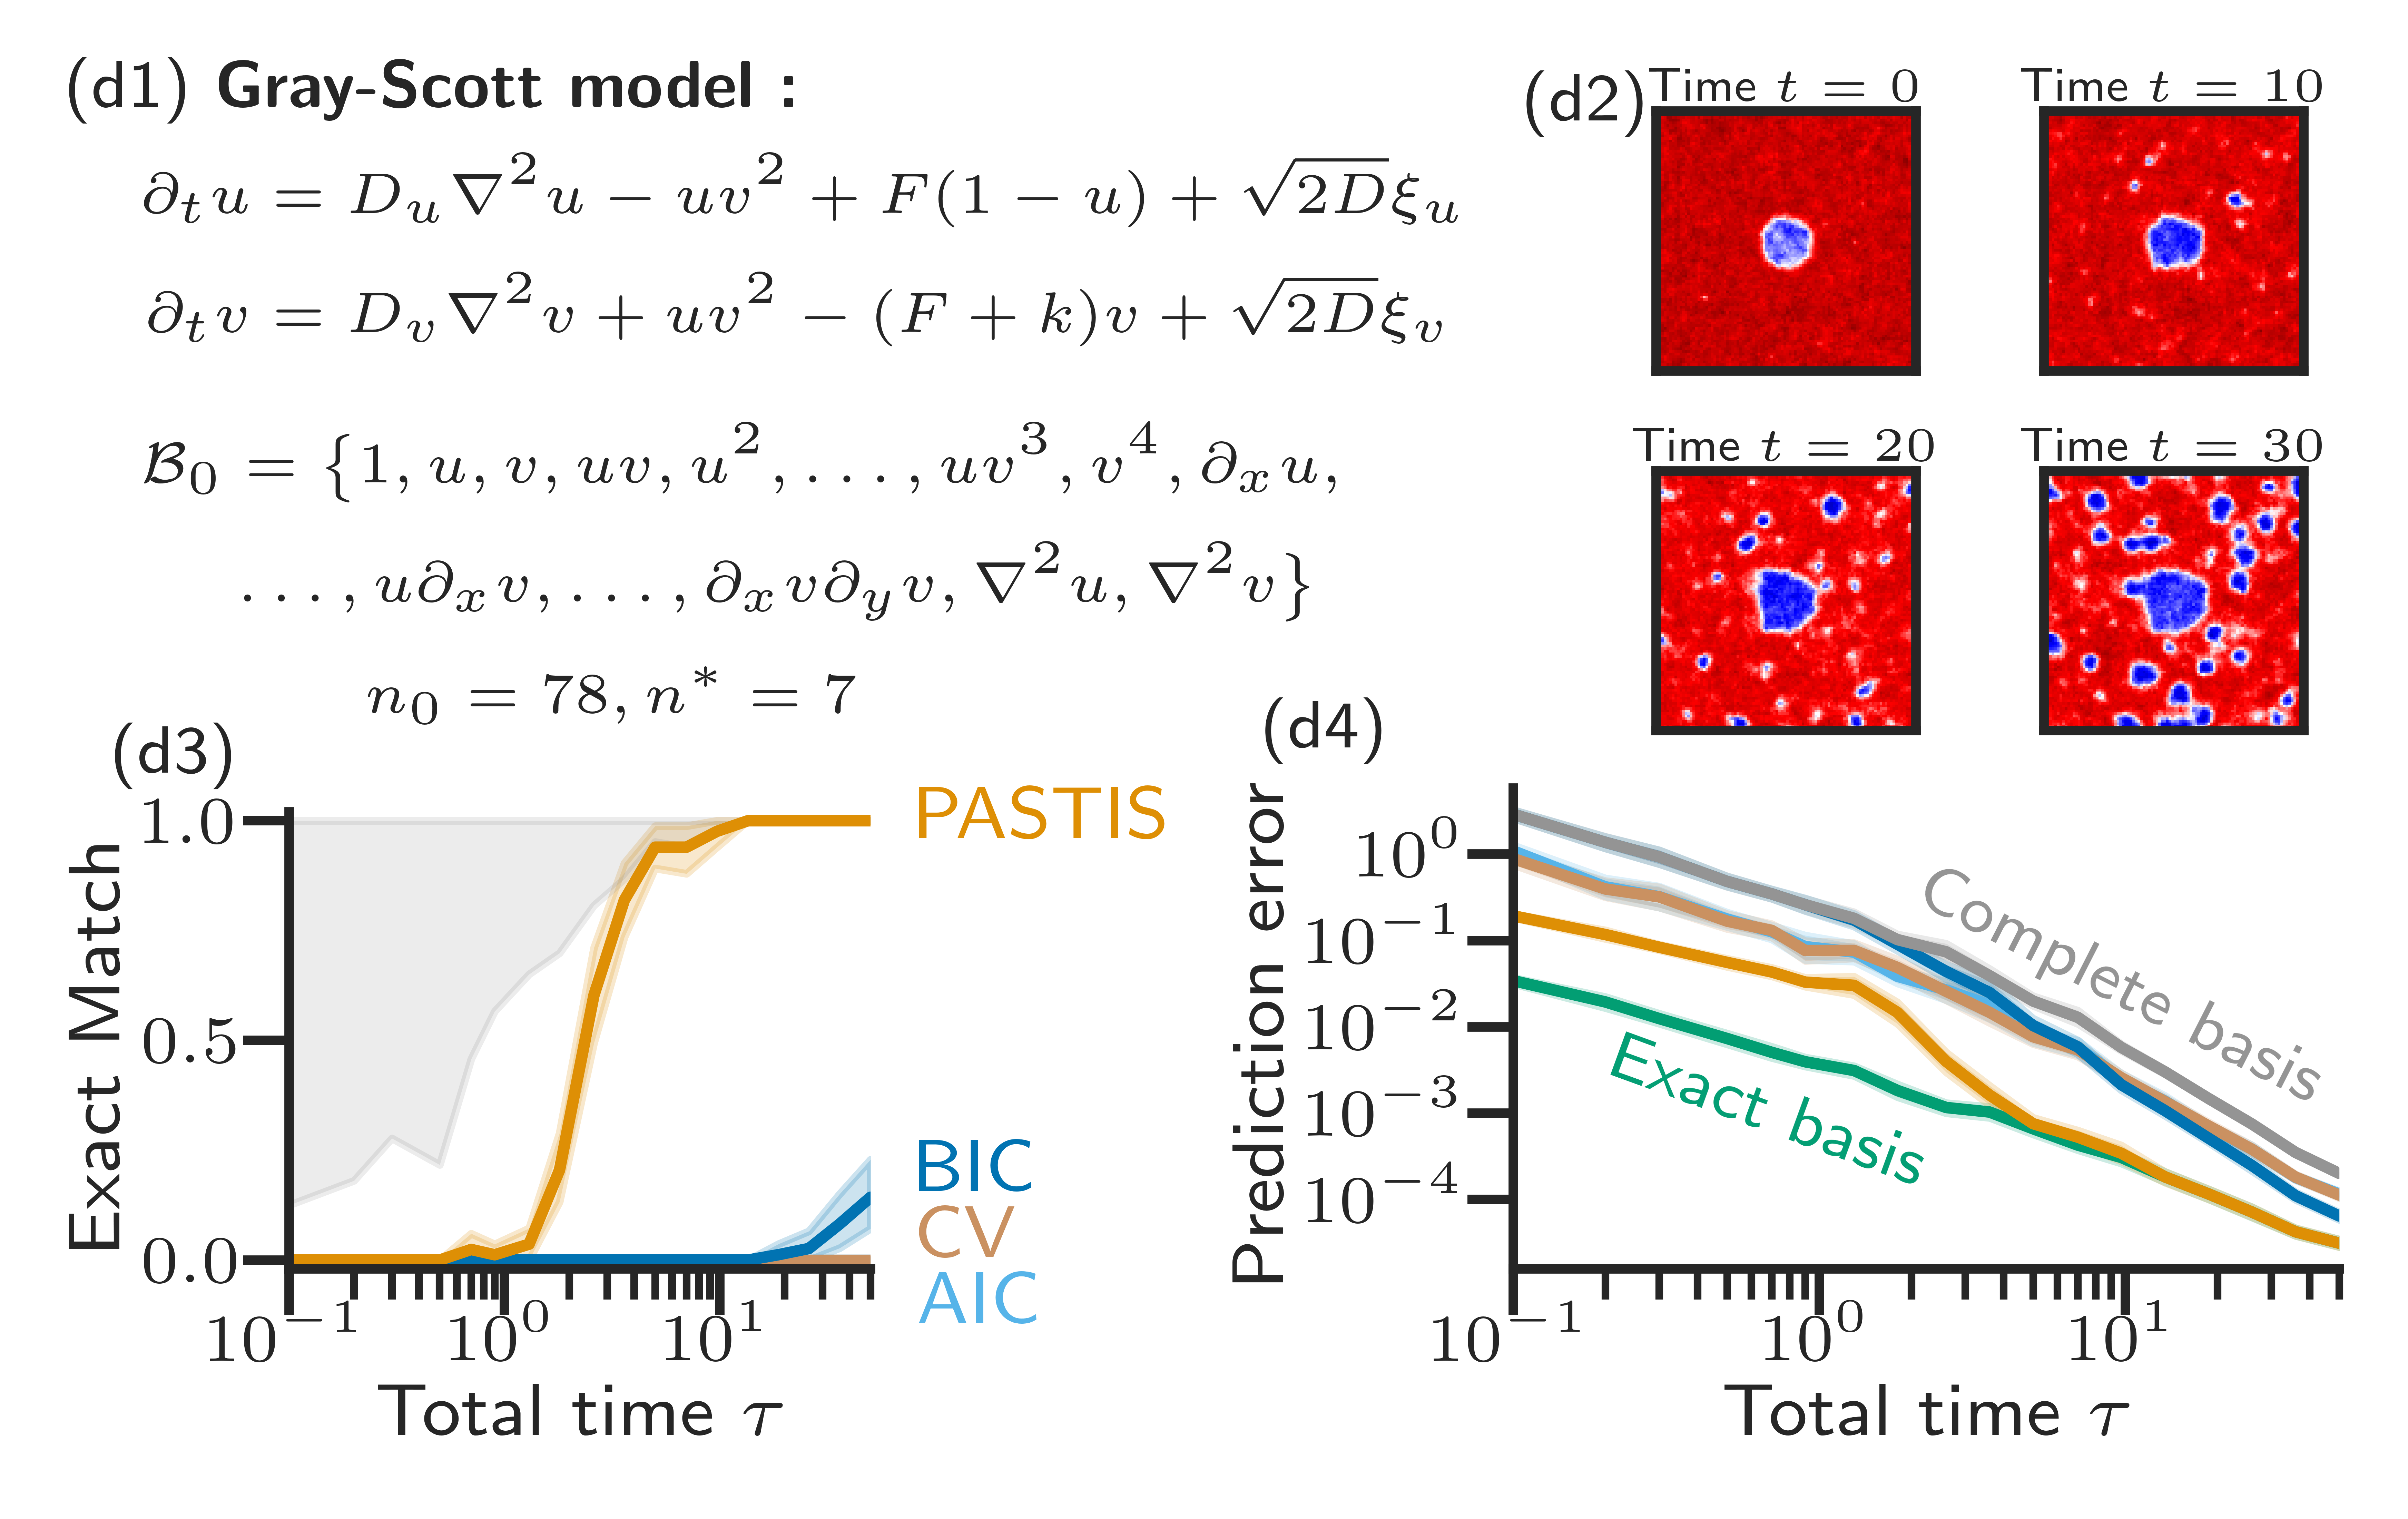

In [7]:
import simulation_models.gray_scott_utils.dumb_base as bd
importlib.reload(labels_plot)

ut.set_favorite_plot_config()

def plot_base(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.axis('off')
    text_base_u = r"$\begin{aligned} \mathcal{B}_0 & = \big\{ 1, u, v, uv, u^2, \dots, u v^3, v^4, \partial_x u,\\&"
    text_base_u += r" \dots, u \partial_x v, \dots, \partial_x v \partial_y v, \nabla^2 u, \nabla^2 v"
    text_base_u += r"\big\}\end{aligned}$"
    y_top = 0.6
    out = ax.text(0.05, y_top, text_base_u, fontsize=6, ha='left', va='bottom', in_layout=False)
    n_base = r"$n_0 = 78, n^* = 7$"
    out = ax.text(0.2, y_top - 0.25, n_base, fontsize=6, ha='left', va='top', in_layout=False)
    return ax

def plot_equation_Gray_Scott(ax=None, fontsize=6):
    if ax is None:
        fig, ax = plt.subplots()
    equation = r'''\begin{align*} \partial_t u &= D_{u}\nabla^{2}u - u v^{2} + F(1 - u) + \sqrt{2 D} \xi_u \\ \partial_t v &= D_{v}\nabla^{2}v + u v^{2} - (F + k)v + \sqrt{2 D} \xi_v  \end{align*}
    '''
    out = ax.text(0.05, 0.8, equation, fontsize=fontsize, ha='left', va='top')
    out.set_in_layout(False)
    ax.axis('off')
    return ax

method_to_plot = ["AIC",  "BIC", "PASTIS", "CV"]
                #"Total model"]
  
#fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=ut.set_size(width="article", fraction=0.8, subplots=(n_rows, 1)), constrained_layout=False)
fig = plt.figure(figsize=ut.set_size(width="article", fraction=1, subplots=(1, 1)), constrained_layout=True)
gs0 = gridspec.GridSpec(6, 6, figure=fig)
gs_equation = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[:2, :4])
gs_base = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[2, :4])
gs_trajectory = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[:3,4:])

gs_exact_match = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[3:, :3])
gs_prediction_error = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[3:, 3:])

ax_equation = fig.add_subplot(gs_equation[0,:])
ax_base = fig.add_subplot(gs_base[0])


ax_time_accu = fig.add_subplot(gs_exact_match[0, 0])
ax_error = fig.add_subplot(gs_prediction_error[0, 0])

ax_graph_1 = fig.add_subplot(gs_trajectory[0,0])
ax_graph_2 = fig.add_subplot(gs_trajectory[0,1])
ax_graph_3 = fig.add_subplot(gs_trajectory[1,0])
ax_graph_4 = fig.add_subplot(gs_trajectory[1,1])


plot_equation_Gray_Scott(ax=ax_equation)
plot_base(ax=ax_base)

plot_error_and_accuracy.plot_from_csv(name_csv_time, parameter="time", method_to_plot=method_to_plot, l_y_plot=["Exact_model_found"], axs=[ax_time_accu], add_legend_on_line=True)
plot_error_and_accuracy.add_pareto_zone(ax_time_accu, name_csv_time)

method_to_plot_error = method_to_plot + [ "Complete basis", "Exact basis"]
plot_error_and_accuracy.plot_from_csv(name_csv_time, parameter="time", verbose=True, method_to_plot=method_to_plot_error, l_y_plot=["predictive_error"], axs=[ax_error], add_legend_on_line=False)
ax_error.legend().remove()
ax_error.set_yticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0])
sns.despine(ax=ax_error)
ax_error.text(2, 0.2, "Complete basis", fontsize=7, ha='left', va='bottom', rotation=-27, rotation_mode='anchor', color=labels_plot.color_dict_name_to_color["Complete basis"])
ax_error.text(0.2, 0.002, "Exact basis", fontsize=7, ha='left', va='bottom', rotation=-20, rotation_mode='anchor', color=labels_plot.color_dict_name_to_color["Exact basis"])

plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_1, parameter="time", parameters_value_plot=[1], start_time=True, x=simu_1)
plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_2, parameter="time", parameters_value_plot=[10], x=simu_2)
plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_3, parameter="time", parameters_value_plot=[20], x=simu_3)
plot_trajectory.plot_trajectory_field(name_csv_time, model_class, ax=ax_graph_4, parameter="time", parameters_value_plot=[30], x=simu_4)

fontdict = {"fontsize": 5}
pad = 0
ax_graph_1.set_title(r"$\text{Time } t=0$", fontdict=fontdict, pad=pad)
ax_graph_2.set_title(r"$\text{Time } t=10$", fontdict=fontdict, pad=pad)
ax_graph_3.set_title(r"$\text{Time } t=20$", fontdict=fontdict, pad=pad)
ax_graph_4.set_title(r"$\text{Time } t=30$", fontdict=fontdict, pad=pad)

hf.add_letter(ax_equation, "d1", x=0, y=0.87, title="Gray-Scott model : ")
hf.add_letter(ax_graph_1, "d2", x=-0.5, y=0.9)
hf.add_letter(ax_time_accu, "d3")
hf.add_letter(ax_error, "d4")

plt.savefig("figures/GrayScott_square.png", dpi=2000, bbox_inches='tight')
plt.savefig("figures/GrayScott_square.pdf", dpi=2000, bbox_inches='tight')